# Zadanie 4 Pracownia Specjalistyczna - Eksploracja danych
### Krzysztof Funkowski

In [1]:
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zadanie 4
- Konstrukcja klasyfikatora liniowego w oparciu o kryterium Fishera 
- Wybór progu na podstawie dwu zbiorów danych

### Funkcja służąca do obliczania kowariancji dla dwóch wektorów

In [2]:
def cov(x, y, x_avg, y_avg):
    elements_count = len(x) # ilość elementów w tablicy
    elements_sum = 0
    
    for x,y in zip(x,y):
        elements_sum = elements_sum + ((x - x_avg)*(y - y_avg)) # sumowanie (x - średnia_arytmetyczna_x) * (y - średnia_arytmetyczna_y)
    
    return elements_sum / elements_count # suma dzielona przez liczbę elementów

### Funkcja obliczająca macierz kowariancji dla zbioru danych

In [3]:
def cov_for_dataset(cov_dataset):
    avgs = []
    matrix_shape = cov_dataset.shape[1] # wymiary_macierzy czyli liczba_kolumn_bioru_danych x liczba_kolumn_bioru_danych
    for i in range(matrix_shape):
        avgs.append(cov_dataset[:,i].mean()) # obliczanie średnich dla każdego parametru
    
    matrix = []
    for i in range(matrix_shape):
        matrix_row = []
        for j in range(matrix_shape):
            #matrix_shape*i + j
            res = cov(cov_dataset[:,i],cov_dataset[:,j],avgs[i], avgs[j]) # wyznaczanie kowariancji dla każdej pary parametrów
            matrix_row.append(res) # budowanie wiersza macierzy
        matrix.append(matrix_row) # dodawanie wiersza macierzy do tablicy bazowej
    
    return np.matrix(matrix) # przekształcanie typu tablicy na macierz

### Funkcja do obliczania długości wektora własnego

In [4]:
def eigenvector_len(v1):
    dims = v1.shape[0] # ilość elementów wektora
    length = 0
    
    for i in range(dims):
        val = v1[i].ravel().tolist()[0][0]
        length = length + pow(val,2) # sumowanie elementów podniesionych do kwadratu
        
    
    length = sqrt(length) # pierwiastkowanie wyniku sumy elementów wektora podniesionych do kwadratów
    
    return length # zwracanie długości

### Funkcja normalizująca, zwracająca wartość własną i wektor własny

In [5]:
def eigenvector_normalization(v1):
    eigenvalue = eigenvector_len(v1) # wylicznaie wartości własnej
    eigenvector = v1 / eigenvalue # wyliczanie wektora własnego
    
    return eigenvalue, eigenvector # zwrócenie wartości własnej i wektora własnego

### Pomocnicza funkcja zmieniająca tablicę wektorów własnych w odpowiednią formę macierzy

In [6]:
def rearrange_matrix(eigenvectors):
    res = []

    for i in range(len(eigenvectors)):
        row = eigenvectors[i].ravel().tolist()[0]
        res.append(row)

    return np.matrix(res).T

### Funkcja odpowiadająca za obliczanie wartości własnych i wektorów własnych

In [7]:
def eigenvalues_eigenvectors(matrix, num_iterations):
    n = matrix.shape[0] # jeden z wymiarów macierzy, ponieważ jest kwadratowa to wystarczy tylko jeden
    eigenvalues = [] # lista na wartości własne
    eigenvectors = [] # lista na wektory własne
    
    for i in range(n):
        # losowe dane wektora na początku
        eigenvector = np.random.rand(n,1)
    
        # algorytm iteracyjny wykonywany num_iterations razy
        for _ in range(num_iterations):
            eigenvector = np.dot(matrix, eigenvector) # mnożenie macierzy kowariancji przez wektor 
            eigenvalue, eigenvector = eigenvector_normalization(eigenvector) # normalizacja wektora
            
        # usuwanie z macierzy znalezionej wartości własnej i wektora własnego
        # marix - wartość własna * iloczyn zewnętrzny wektora własnego
        matrix = matrix - eigenvalue * np.multiply(eigenvector,eigenvector.T).T 
        
        eigenvalues.append(eigenvalue) # dodanie znalezionej wartości własnej do listy
        eigenvectors.append(eigenvector) # dodanie znalezionego wektora własnego do listy
        
        
        
    return eigenvalues, rearrange_matrix(eigenvectors) # zwrócenie wartości własnych i wektorów własnych

### Rysowanie wykresu dla serii

In [8]:
def draw_plot(datasets):
    colors = ['red','blue','green']
    
    print(len(datasets))
    
    # dla każdego zbioru danych z danej kategorii
    for i in range(len(datasets)):
        # przejście po wszystkich punktach
        for j in range(datasets[i][1].shape[0]):
            if j==0:
                # zaznaczanie punktu dla pierwszego (SepalLengthCm) i drugiego (SepalWidthCm) parametru
                plt.scatter(datasets[i][1][j,0],datasets[i][1][j,1], color=colors[i], label=datasets[i][0]) 
            else:
                # zaznaczanie punktu dla pierwszego (SepalLengthCm) i drugiego (SepalWidthCm) parametru
                plt.scatter(datasets[i][1][j,0],datasets[i][1][j,1], color=colors[i])
    
    plt.grid()
    plt.legend()
    plt.show() 

# ZADANIE

In [9]:
df = pd.read_csv('Iris.csv', sep=',', index_col=0)
dataset = df.to_numpy()
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [10]:
species = np.array(list(set(dataset[:,4])))
species

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype='<U15')

In [11]:
species1 = df[df['Species'].str.contains('Iris-virginica')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species1 = species1[:, [0, 1, 2, 3]]

### Obliczanie wektorów i wartości własnych dla klasy Iris-virginica

In [17]:
num_iterations = 10000 # ustalenie liczby iteracji
species1_cov_matrix = cov_for_dataset(species1) # macierz kowariancji dla głównego w tym momencie gatunku
# wartości własne i wektory własne dla badanego gatunku
species1_eigenvalues, species1_eigenvectors = eigenvalues_eigenvectors(species1_cov_matrix,num_iterations)
print(f'Iris-virginica: \n macierz cov:\n{species1_cov_matrix} \n\n wartości własne: {species1_eigenvalues}\n wektory własne:\n{species1_eigenvectors}')

Iris-virginica: 
 macierz cov:
[[0.396256 0.091888 0.297224 0.048112]
 [0.091888 0.101924 0.069952 0.046676]
 [0.297224 0.069952 0.298496 0.047848]
 [0.048112 0.046676 0.047848 0.073924]] 

 wartości własne: [0.681349741460896, 0.10442020142375677, 0.05124951922482229, 0.033580537890525175]
 wektory własne:
[[ 0.74101679 -0.16525895 -0.53445017 -0.37141165]
 [ 0.20328772  0.74864279 -0.3253749   0.54068405]
 [ 0.62789179 -0.16942776  0.65152357  0.39059336]
 [ 0.12377451  0.61928804  0.4289653  -0.64587225]]


### Projekcja klas na wektory własne klasy Iris-virginica

In [18]:
current_datasets = [] # lista w której będą zbiory do rysowania
s1 = np.asarray(species1 * species1_eigenvectors[:,:2])
current_datasets.append(('Iris-virginica',s1))

In [19]:
species2 = df[df['Species'].str.contains('Iris-setosa')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species2 = species2[:, [0, 1, 2, 3]]
s2 = np.asarray(species2 * species1_eigenvectors[:,:2])
current_datasets.append(('Iris-setosa',s2))

In [20]:
species3 = df[df['Species'].str.contains('Iris-versicolor')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species3 = species3[:, [0, 1, 2, 3]]
s3 = np.asarray(species3 * species1_eigenvectors[:,:2])
current_datasets.append(('Iris-versicolor',s3))

### Trzy klasy po projekcji na wektory własne klasy Iris-virginica

3


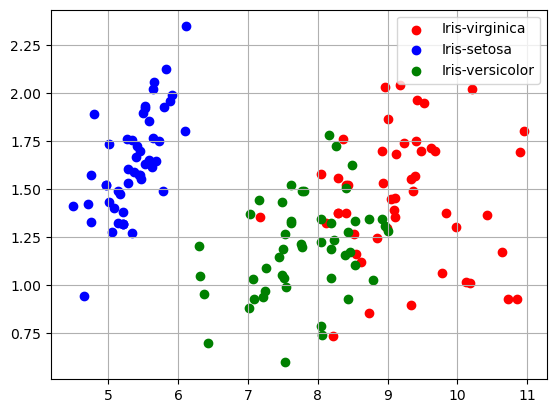

In [27]:
draw_plot(current_datasets)

### Zmiana typu serii na macierzowy z biblioteki numpy

In [24]:
s2_m = np.matrix(s2)
s3_m = np.matrix(s3)

In [25]:
s2_m_mean = np.mean(s2_m, axis=0)
s3_m_mean = np.mean(s3_m, axis=0)
print(f'Wartości średnie w macierzach Setosa: {s2_m_mean}, Versicolor: {s3_m_mean}')

Wartości średnie w macierzach Setosa: [[5.353802013598783 1.634638797372408]], Versicolor: [[7.80072663740321 1.1921770788768231]]


### Wykres serii 2 (Iris-setosa) i serii 3 (Iris-versicolor) oraz ich wartości średnich

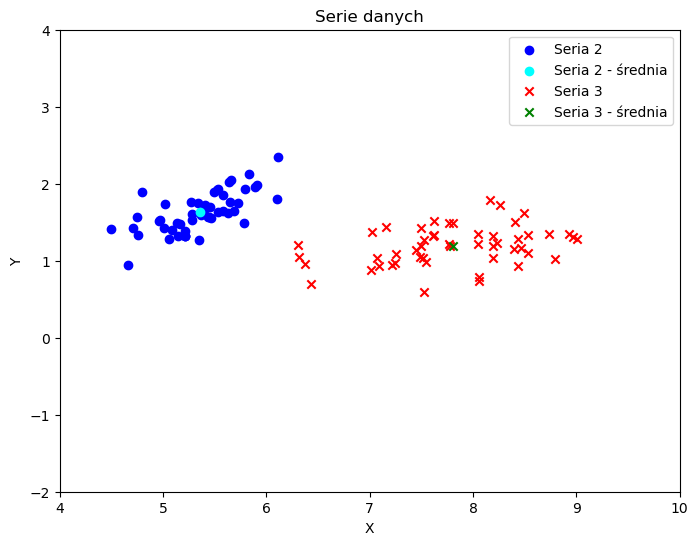

In [26]:
plt.figure(figsize=(8, 6))

plt.scatter(s2[:,[0]], s2[:,[1]], label='Seria 2', color='blue', marker='o')
plt.scatter(s2_m_mean[0, 0], s2_m_mean[0, 1], label='Seria 2 - średnia', color='cyan', marker='o')
plt.scatter(s3[:,[0]], s3[:,[1]], label='Seria 3', color='red', marker='x')
plt.scatter(s3_m_mean[0, 0], s3_m_mean[0, 1], label='Seria 3 - średnia', color='green', marker='x')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(4, 10)
plt.ylim(-2, 4)

plt.legend()
plt.title('Serie danych')
plt.show()

### Obliczenie Sw

In [29]:
Sw = cov_for_dataset(s2)+cov_for_dataset(s3) # dodanie macierzy kowariancji s2 i s3 do siebie
Sw = Sw.astype(np.float64)
Sw

matrix([[0.6042078 , 0.1255536 ],
        [0.1255536 , 0.13117688]])

### Obliczamy wektor "w"

In [31]:
w = np.linalg.inv(Sw) * (s3_m_mean.T - s2_m_mean.T)
w = w / sqrt(np.dot(w.T, w)[0, 0]) # [0, 0] ponieważ wyciągamy ten element z obiektu np.Matrix żeby przyjęło go sqrt
w

matrix([[0.5481254282141248],
        [-0.8363961471366795]], dtype=object)

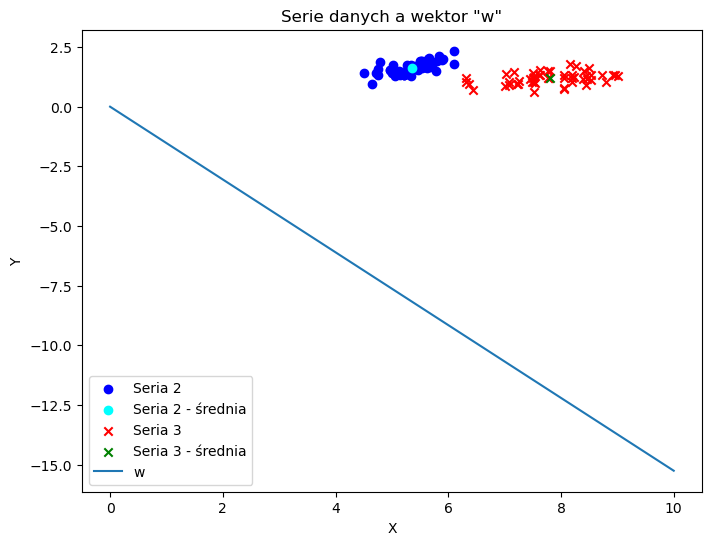

In [65]:
plt.figure(figsize=(8, 6))

plt.scatter(s2[:,[0]], s2[:,[1]], label='Seria 2', color='blue', marker='o')
plt.scatter(s2_m_mean[0, 0], s2_m_mean[0, 1], label='Seria 2 - średnia', color='cyan', marker='o')
plt.scatter(s3[:,[0]], s3[:,[1]], label='Seria 3', color='red', marker='x')
plt.scatter(s3_m_mean[0, 0], s3_m_mean[0, 1], label='Seria 3 - średnia', color='green', marker='x')

x = np.linspace(0, 10, 100)
plt.plot(x, x * w[1,0] / w[0,0], label="w")

plt.xlabel('X')
plt.ylabel('Y')

#plt.xlim(4, 10)
#plt.ylim(-2, 4)

plt.legend()
plt.title('Serie danych a wektor "w"')
plt.show()

### Projekcja serii na wektor "w"

In [54]:
s2_m_proj_w = s2_m * np.multiply(w,w.T).T # przemnożenie serii 2 przez iloczyn zewnętrzny
s2_m_proj_w

matrix([[0.8578293219828669, -1.3089798481800317],
        [0.9392199034571733, -1.4331754524236109],
        [0.7964811390148978, -1.215367362374683],
        [0.8481193257165589, -1.2941631601597139],
        [0.7997758846206462, -1.2203948841581953],
        [0.8650427264973989, -1.3199869342102315],
        [0.712173108792961, -1.0867199615780097],
        [0.8828356189666944, -1.3471374839598087],
        [0.8182362505307104, -1.2485639457035014],
        [0.9623104311243437, -1.4684097754125995],
        [0.9175519122168299, -1.4001118077599033],
        [0.8497884785883005, -1.2967101557177478],
        [0.9340529486725021, -1.425291087181865],
        [0.7049597042784296, -1.075712875547811],
        [0.8723725363134623, -1.331171645544231],
        [0.760227880635538, -1.1600477510797993],
        [0.7585151676260622, -1.1574342861892106],
        [0.833156761719424, -1.2713314682981192],
        [1.0074477542192901, -1.5372857683612953],
        [0.7751468844949382, -1.182812

In [55]:
s3_m_proj_w = s3_m * np.multiply(w,w.T).T # przemnożenie serii 2 przez iloczyn zewnętrzny
s3_m_proj_w

matrix([[2.09220351236657, -3.1925374498145445],
        [1.8352300823787742, -2.800416275180175],
        [2.1191691388047884, -3.2336848677176633],
        [1.7367854197104244, -2.6501974888884137],
        [2.00455717640115, -3.058796057901803],
        [1.7885542868252895, -2.7291926946711107],
        [1.8057678641887795, -2.7554592552869375],
        [1.4171288598731224, -2.1624268048572373],
        [2.0555278896620424, -3.136573343891106],
        [1.4831067353283784, -2.2631038360375575],
        [1.6130878436133322, -2.461444749584121],
        [1.6625646826129152, -2.536942501342478],
        [1.9882145980554298, -3.033858573050617],
        [1.9082896438758645, -2.9118994003961616],
        [1.4908138420025603, -2.2748642726019765],
        [1.9510032203828318, -2.977076947325984],
        [1.6529418066220762, -2.5222587519872706],
        [1.8140978461065018, -2.768170150317662],
        [2.057690275423615, -3.1398729739146485],
        [1.732910320939376, -2.6442843939742

### Wyliczenie średnich dla serii 2 i 3 po projekcji na wektor w

In [56]:
s2_m_mean_proj_w = s2_m_mean * w * w.T
s2_m_mean_proj_w

matrix([[0.859104077038706, -1.3109250237956216]], dtype=object)

In [57]:
s3_m_mean_proj_w = s3_m_mean * w * w.T
s3_m_mean_proj_w

matrix([[1.797108318041773, -2.7422454712504867]], dtype=object)

In [145]:
s2_proj_w = np.asarray(s2_m_proj_w[:,[0,1]])
s3_proj_w = np.asarray(s3_m_proj_w[:,[0,1]])

### Pokazanie separacji klas po projekcji na wektor w

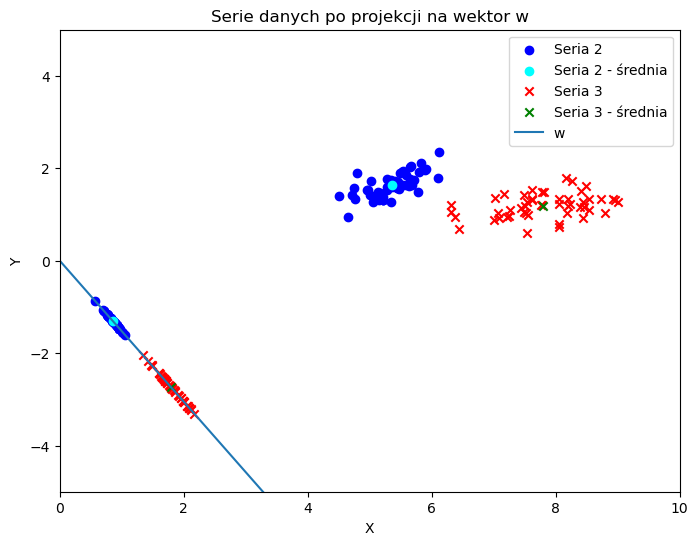

In [146]:
plt.figure(figsize=(8, 6))

plt.scatter(s2_proj_w[:,[0]], s2_proj_w[:,[1]], label='Seria 2', color='blue', marker='o')
plt.scatter(s2_m_mean_proj_w[0, 0], s2_m_mean_proj_w[0, 1], label='Seria 2 - średnia', color='cyan', marker='o')
plt.scatter(s3_proj_w[:,[0]], s3_proj_w[:,[1]], label='Seria 3', color='red', marker='x')
plt.scatter(s3_m_mean_proj_w[0, 0], s3_m_mean_proj_w[0, 1], label='Seria 3 - średnia', color='green', marker='x')
plt.scatter(s2[:,[0]], s2[:,[1]], color='blue', marker='o')
plt.scatter(s2_m_mean[0, 0], s2_m_mean[0, 1], color='cyan', marker='o')
plt.scatter(s3[:,[0]], s3[:,[1]], color='red', marker='x')
plt.scatter(s3_m_mean[0, 0], s3_m_mean[0, 1], color='green', marker='x')

x = np.linspace(0, 10, 100)
plt.plot(x, x * w[1,0] / w[0,0], label="w")

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(0, 10)
plt.ylim(-5, 5)

plt.legend()
plt.title('Serie danych po projekcji na wektor w')
plt.show()

In [151]:
s2_t = np.dot(s2_m_proj_w, w)
#2_t = np.hstack((s2_t, np.ones((s2_t.shape[0], 1))))

s3_t = np.dot(s3_m_proj_w, w)
#s3_t = np.hstack((s3_t, 2*np.ones((s3_t.shape[0], 1))))

s2_t = np.array(s2_t).flat
s2_t = list(s2_t)


s3_t = np.array(s3_t).flat
s3_t = list(s3_t)

In [157]:
s2_tt = [[element, 'Iris-setosa'] for element in s2_t]
s3_tt = [[element, 'Iris-versicolor'] for element in s3_t]
s23_t = sorted(s2_tt + s3_tt, key=lambda x: x[0])
s23_t

[[1.0470053677799152, 'Iris-setosa'],
 [1.2861284443148246, 'Iris-setosa'],
 [1.2897825159725689, 'Iris-setosa'],
 [1.2992885791000939, 'Iris-setosa'],
 [1.3838350285944927, 'Iris-setosa'],
 [1.3869597021113849, 'Iris-setosa'],
 [1.3927294724968515, 'Iris-setosa'],
 [1.4042219417467685, 'Iris-setosa'],
 [1.4141779319023442, 'Iris-setosa'],
 [1.416984720968034, 'Iris-setosa'],
 [1.420638792625778, 'Iris-setosa'],
 [1.4224662565225659, 'Iris-setosa'],
 [1.4277085226028638, 'Iris-setosa'],
 [1.447248153163085, 'Iris-setosa'],
 [1.4531001446328682, 'Iris-setosa'],
 [1.459111078328251, 'Iris-setosa'],
 [1.4927901688426444, 'Iris-setosa'],
 [1.5077777675247028, 'Iris-setosa'],
 [1.5200111486051173, 'Iris-setosa'],
 [1.547308849508878, 'Iris-setosa'],
 [1.55035405191297, 'Iris-setosa'],
 [1.56351418669824, 'Iris-setosa'],
 [1.5650237661438253, 'Iris-setosa'],
 [1.567830555209516, 'Iris-setosa'],
 [1.5692072359424207, 'Iris-setosa'],
 [1.5781839009290963, 'Iris-setosa'],
 [1.5915564055398472, 

### Obliczanie theta

In [170]:
point_candidates = [] # lista na punkty będące kandydatami na punkt wyznaczenia podziału klas

prev_point = s23_t[0]
for actual_point in s23_t[1:]:
    if actual_point[1] != prev_point[1]: # jeżeli klasa aktualnie badana różni się od klasy poprzedniej to obliczamy kandydata na punkt
        between_point = ((actual_point[0] + prev_point[0]) / 2) # średnia arytmetyczna z aktualnego i poprzednio badanego
        point_candidates.append(between_point)
        
    prev_point = actual_point

point_candidates

[2.1888085037862535]

In [172]:
theta = point_candidates[-1] * w
theta

matrix([[1.199741598416558],
        [-1.8307109993868227]], dtype=object)

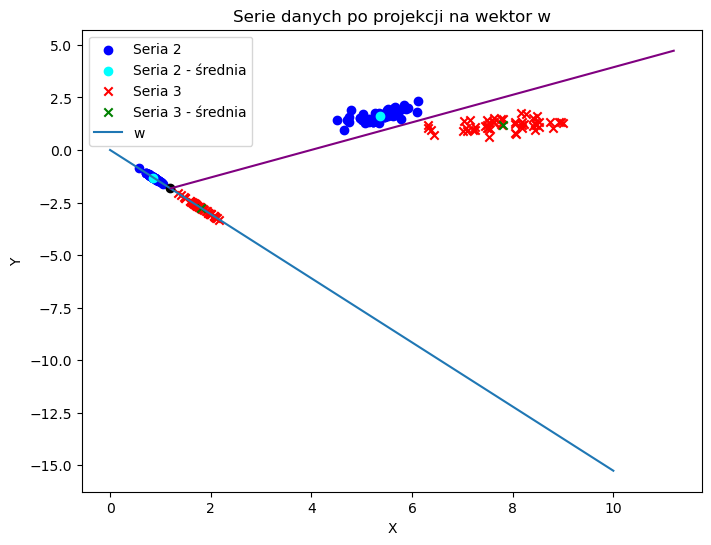

In [206]:
plt.figure(figsize=(8, 6))

plt.scatter(s2_proj_w[:,[0]], s2_proj_w[:,[1]], label='Seria 2', color='blue', marker='o')
plt.scatter(s2_m_mean_proj_w[0, 0], s2_m_mean_proj_w[0, 1], label='Seria 2 - średnia', color='cyan', marker='o')
plt.scatter(s3_proj_w[:,[0]], s3_proj_w[:,[1]], label='Seria 3', color='red', marker='x')
plt.scatter(s3_m_mean_proj_w[0, 0], s3_m_mean_proj_w[0, 1], label='Seria 3 - średnia', color='green', marker='x')
plt.scatter(s2[:,[0]], s2[:,[1]], color='blue', marker='o')
plt.scatter(s2_m_mean[0, 0], s2_m_mean[0, 1], color='cyan', marker='o')
plt.scatter(s3[:,[0]], s3[:,[1]], color='red', marker='x')
plt.scatter(s3_m_mean[0, 0], s3_m_mean[0, 1], color='green', marker='x')

x = np.linspace(0, 10, 100)
plt.plot(x, x * w[1,0] / w[0,0], label="w")

plt.scatter(theta[0][0,0], theta[1][0,0], color='black')
x_div = x + theta[0][0,0]
y_div = -x / (w[1,0] / w[0,0]) + theta[1][0,0]
plt.plot(x_div,y_div, color='purple')

plt.xlabel('X')
plt.ylabel('Y')

#plt.xlim(0, 10)
#plt.ylim(-5, 5)

plt.legend()
plt.title('Serie danych po projekcji na wektor w')
plt.show()

### Wnioski

Udało się poprawnie wyznaczyć podział pomiędzy dwiema seriami w powyższych krokach. Na wykresach widać separowalność wybranych klas.